## Data Visualization with Python Assignment

### Question 1:

A survey was conducted to gauge an audience interest in different data science topics, namely:

    Big Data (Spark / Hadoop)
    Data Analysis / Statistics
    Data Journalism
    Data Visualization
    Deep Learning
    Machine Learning

The participants had three options for each topic: Very Interested, Somewhat interested, and Not interested. 2,233 respondents completed the survey.

The survey results have been saved in a csv file and can be accessed through this link: https://cocl.us/datascience_survey_data.

If you examine the csv file, you will find that the first column represents the data science topics and the first row represents the choices for each topic.

Use the pandas read_csv method to read the csv file into a pandas dataframe, that looks like the following:

https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/zZTfddhxEeisEhKURr0pTg_dd2d58abb47ce1fda0f1a1ccc29df9ca_Topic_Survey_Question.png?expiry=1553644800000&hmac=FIpWAXAAnSoUKxhkNDtMCnDqmnpjdZCWU84g0-QOO3k

In order to read the data into a dataframe like the above, one way to do that is to use the index_col parameter in order to load the first column as the index of the dataframe. Here is the documentation on the pandas read_csv method: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

Once you have succeeded in creating the above dataframe, please upload a screenshot of your dataframe with the actual numbers. (5 marks)

In [14]:
# Importing necessary librarires for data wrangling

import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [15]:
# Read in the data set
df_sr = pd.read_csv('https://cocl.us/datascience_survey_data',index_col = 0)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [16]:
# View top 5 rows of the data 
df_sr.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [17]:
# View the dimensions of the data
print(df_sr.shape)

(6, 3)


In [18]:
# View additional information of the data
df_sr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Big Data (Spark / Hadoop) to Machine Learning
Data columns (total 3 columns):
Very interested        6 non-null int64
Somewhat interested    6 non-null int64
Not interested         6 non-null int64
dtypes: int64(3)
memory usage: 192.0+ bytes


### Question 2:

Use the artist layer of Matplotlib to replicate the bar chart below to visualize the percentage of the respondents' interest in the different data science topics surveyed.

To create this bar chart, you can follow the following steps:

    Sort the dataframe in descending order of Very interested.
    Convert the numbers into percentages of the total number of respondents. Recall that 2,233 respondents completed the survey. Round percentages to 2 decimal places.
    As for the chart:

    use a figure size of (20, 8),
    bar width of 0.8,
    use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars,
    use font size 14 for the bar labels, percentages, and legend,
    use font size 16 for the title, and,
    display the percentages above the bars as shown above, and remove the left, top, and right borders.

Once you are satisfied with your chart, please upload a screenshot of your plot. (5 marks)

In [19]:
# Load in the necessary libraries for plotting.

# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.3


In [20]:
# Sorting the values based on Very interested
df_sr.sort_values(['Very interested'], ascending=False, axis=0, inplace=True)

# Taking the percentage of the responses and rounding it to 2 decimal places 
df_sr = round((df_sr/2233)*100,2)

# View top 5 rows of the data 
df_sr.head()

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09


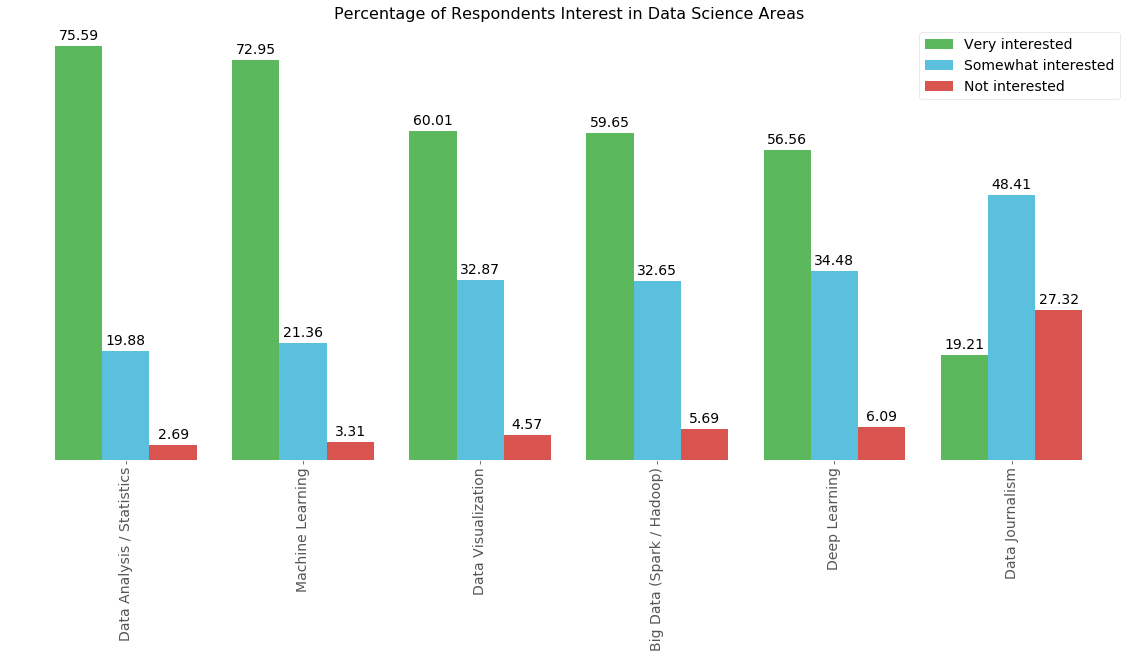

In [63]:
# Plotting
ax = df_sr.plot(kind='bar', 
                figsize=(20, 8),
                rot=90,color = ['#5cb85c','#5bc0de','#d9534f'],
                width=.8,f
                ontsize=14)


# Setting plot title
ax.set_title('Percentage of Respondents Interest in Data Science Areas',fontsize=16)

# Setting figure background color
ax.set_facecolor('white')

# setting legend font size
ax.legend(fontsize=14,facecolor = 'white') 

# Removing the Border 
ax.get_yaxis().set_visible(False)

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )
plt.show()


### Question 3:

In the final lab, we created a map with markers to explore crime rate in San Francisco, California. In this question, you are required to create a Choropleth map to visualize crime in San Francisco.

Before you are ready to start building the map, let's restructure the data so that it is in the right format for the Choropleth map. Essentially, you will need to create a dataframe that lists each neighborhood in San Francisco along with the corresponding total number of crimes.

Based on the San Francisco crime dataset, you will find that San Francisco consists of 10 main neighborhoods, namely:

    Central,
    Southern,
    Bayview,
    Mission,
    Park,
    Richmond,
    Ingleside,
    Taraval,
    Northern, and,
    Tenderloin.

Convert the San Francisco dataset, which you can also find here, https://cocl.us/sanfran_crime_dataset, into a pandas dataframe, like the one shown below, that represents the total number of crimes in each neighborhood.

https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/UcAIVlVkEeiDhgqYR-Lxvg_94c477dfeb3935cccb0b468f5c9ba46b_crime_dataset_masked.png?expiry=1553644800000&hmac=hyTE40Cxg5EErIN9sZnF_14p8PfSvuEm6UC1nydjalY

In [27]:
# Read in the data set
df_sfc = pd.read_csv('https://ibm.box.com/shared/static/nmcltjmocdi8sd5tk93uembzdec8zyaq.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [28]:
df_sfc.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [32]:
df_sfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
IncidntNum    150500 non-null int64
Category      150500 non-null object
Descript      150500 non-null object
DayOfWeek     150500 non-null object
Date          150500 non-null object
Time          150500 non-null object
PdDistrict    150499 non-null object
Resolution    150500 non-null object
Address       150500 non-null object
X             150500 non-null float64
Y             150500 non-null float64
Location      150500 non-null object
PdId          150500 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 14.9+ MB


In [61]:
# Assigning a variable with the total counts of each Neighborhood
df_neig= df_sfc['PdDistrict'].value_counts()

# Assigning the values of the variable to a Pandas Data frame
df_neig1 = pd.DataFrame(data=df_neig.values, index = df_neig.index, columns=['Count'])

# Reindexing the data frame to the requirement
df_neig1 = df_neig1.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

# Resetting the index
df_neig1 = df_neig1.reset_index()

# Assignming the column names
df_neig1.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

# View the data frame
df_neig1

,Neighborhood,Count
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28445
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303


### Question 4:

Now you should be ready to proceed with creating the Choropleth map.

As you learned in the Choropleth maps lab, you will need a GeoJSON file that marks the boundaries of the different neighborhoods in San Francisco. In order to save you the hassle of looking for the right file, I already downloaded it for you and I am making it available via this link: https://cocl.us/sanfran_geojson.

For the map, make sure that:

    it is centred around San Francisco,
    you use a zoom level of 12,
    you use fill_color = 'YlOrRd',
    you define fill_opacity = 0.7,
    you define line_opacity=0.2, and,
    you define a legend and use the default threshold scale.

If you follow the lab on Choropleth maps and use the GeoJSON correctly, you should be able to generate the following map:

https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/okW9uVVkEeiDhgqYR-Lxvg_9e78dcfa79cdc9d18d31ac51173865db_sanfran_map_masked.png?expiry=1553644800000&hmac=DnArYgH-k_ZFW-Vy5hkJHaT8ERzwpWUn43APN_XwPag

In [70]:
# Load the packages for creating the Choropleth map
import folium

In [71]:
# Read in the GeoJSON file
geojson = r'https://cocl.us/sanfran_geojson'

# Create the map centering San Fransico
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)

In [72]:
# Display the map
sf_map.choropleth(geo_data=geojson,
                  data=df_neig1,
                  columns=['Neighborhood', 'Count'],
                  key_on='feature.properties.DISTRICT',
                  fill_color='YlOrRd', 
                  fill_opacity=0.7, 
                  line_opacity=0.2,
                  legend_name='Crime Rate in San Francisco'
)

sf_map